# Final Evaluation of the models

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import json
from prophet import Prophet
import pandas as pd

import sys
sys.path.insert(0, "../Src/")
import loadData
import trainModel as tm
import visualization as viz

%autosave 5

Autosaving every 5 seconds


Autosaving every 5 seconds


Autosaving every 5 seconds


In [2]:
data = loadData.loadData('MSFT')


[*********************100%***********************]  1 of 1 completed


## Autoregression

len(fullPredict)  155
len(validation['y'])  155
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


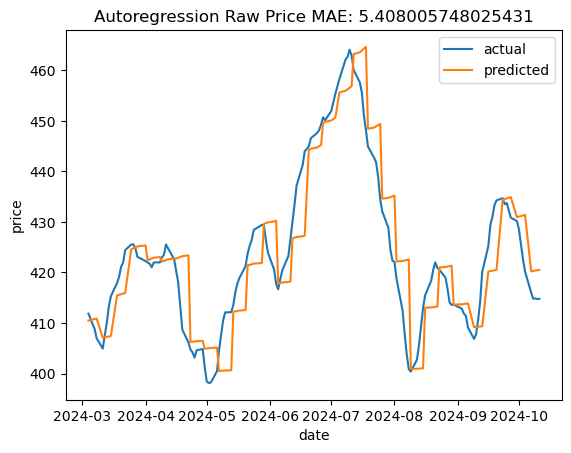

Autoregression Raw Price MAE: 5.408005748025431


<Figure size 640x480 with 0 Axes>

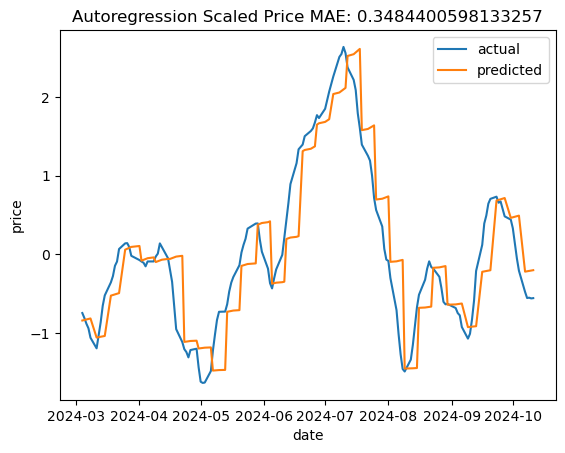

Autoregression Scaled Price MAE: 0.3484400598133257


<Figure size 640x480 with 0 Axes>

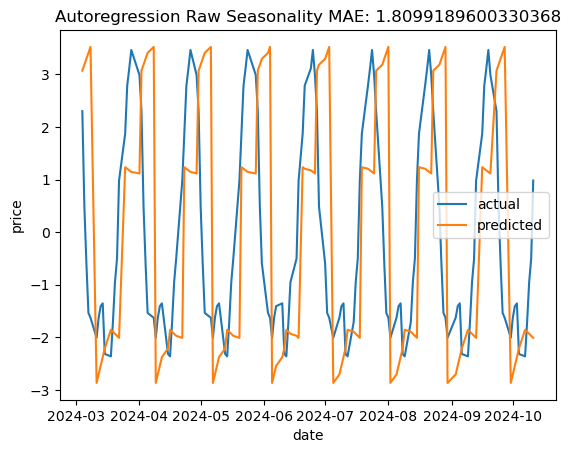

Autoregression Raw Seasonality MAE: 1.8099189600330368


<Figure size 640x480 with 0 Axes>

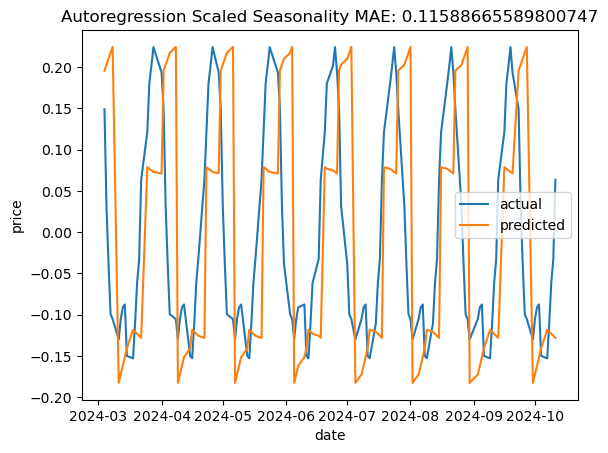

Autoregression Scaled Seasonality MAE: 0.11588665589800747


<Figure size 640x480 with 0 Axes>

In [3]:
viz.compareSimplePickleModel(data, 'Autoregression','ar_params')

## ARIMA

len(fullPredict)  155
len(validation['y'])  155
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


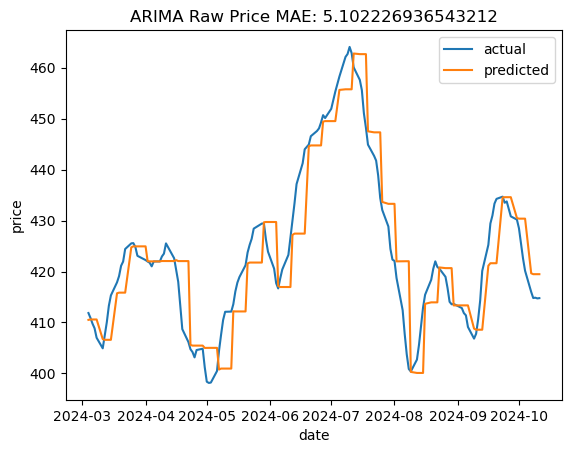

ARIMA Raw Price MAE: 5.102226936543212


<Figure size 640x480 with 0 Axes>

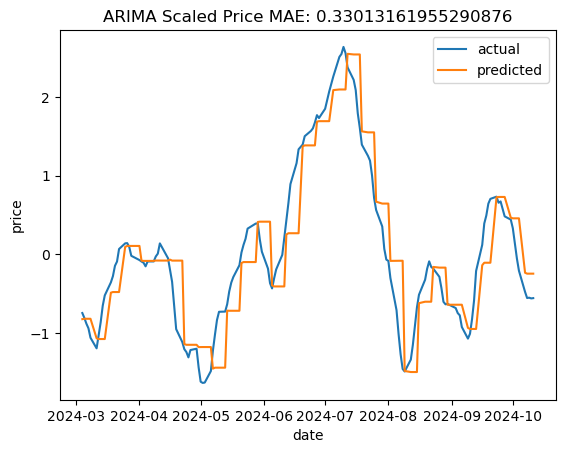

ARIMA Scaled Price MAE: 0.33013161955290876


<Figure size 640x480 with 0 Axes>

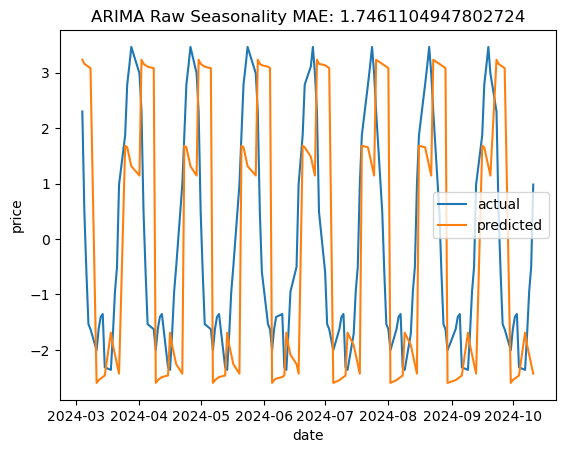

ARIMA Raw Seasonality MAE: 1.7461104947802724


<Figure size 640x480 with 0 Axes>

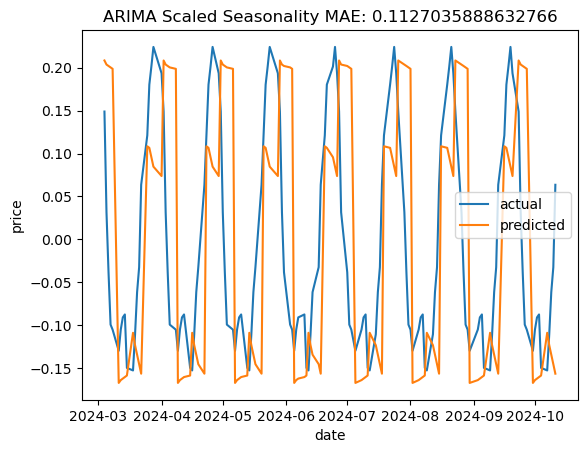

ARIMA Scaled Seasonality MAE: 0.1127035888632766


<Figure size 640x480 with 0 Axes>

In [4]:
viz.compareSimplePickleModel(data, 'ARIMA','arima_params')

## SARIMA

len(fullPredict)  155
len(validation['y'])  155
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


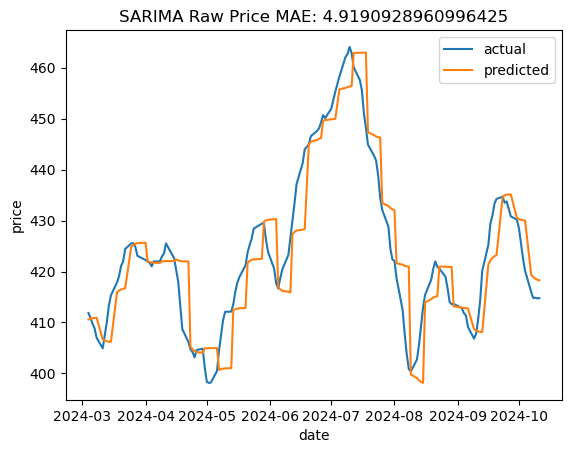

SARIMA Raw Price MAE: 4.9190928960996425


<Figure size 640x480 with 0 Axes>

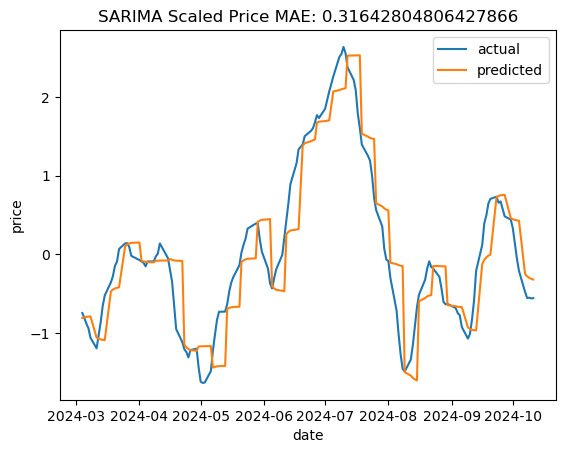

SARIMA Scaled Price MAE: 0.31642804806427866


<Figure size 640x480 with 0 Axes>

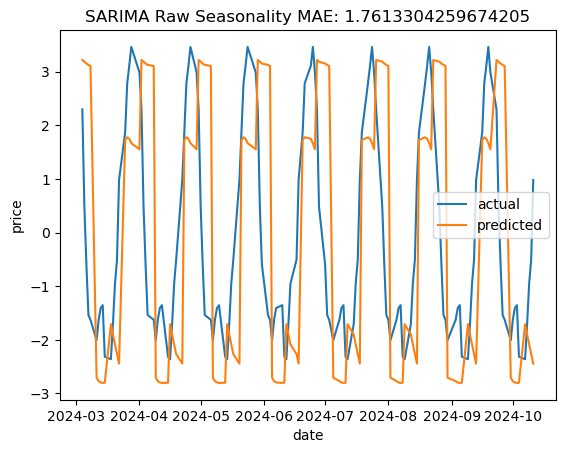

SARIMA Raw Seasonality MAE: 1.7613304259674205


<Figure size 640x480 with 0 Axes>

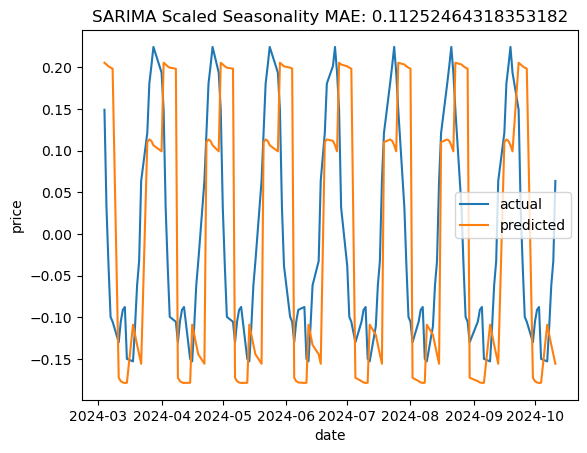

SARIMA Scaled Seasonality MAE: 0.11252464318353182


<Figure size 640x480 with 0 Axes>

In [5]:
viz.compareSimplePickleModel(data,'SARIMA')

## ExponentialSmoothing

len(fullPredict)  155
len(validation['y'])  155
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


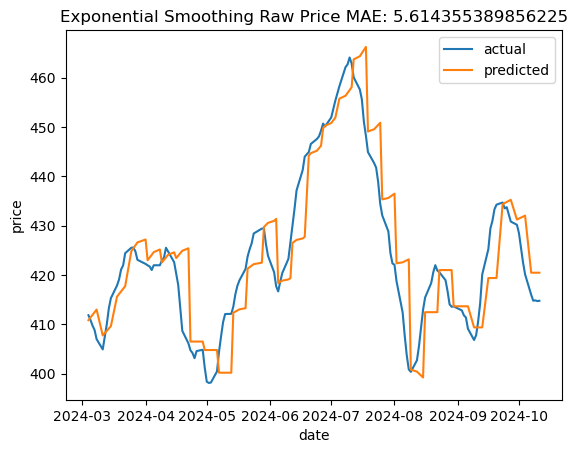

Exponential Smoothing Raw Price MAE: 5.614355389856225


<Figure size 640x480 with 0 Axes>

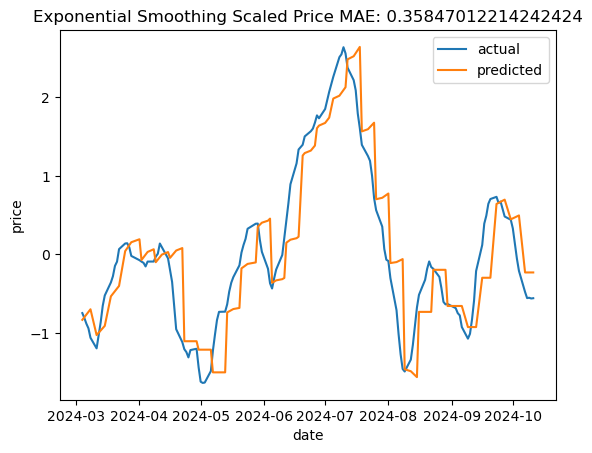

Exponential Smoothing Scaled Price MAE: 0.35847012214242424


<Figure size 640x480 with 0 Axes>

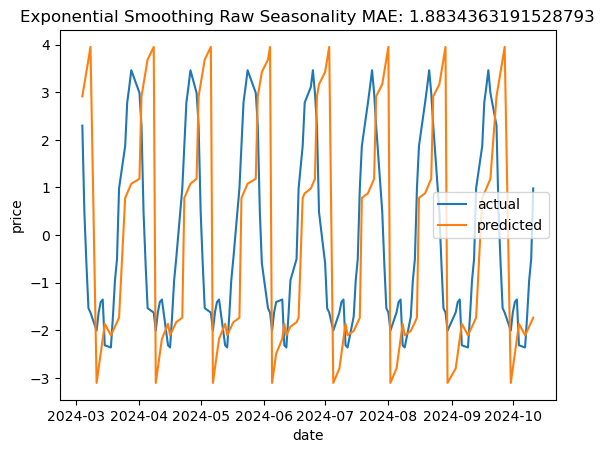

Exponential Smoothing Raw Seasonality MAE: 1.8834363191528793


<Figure size 640x480 with 0 Axes>

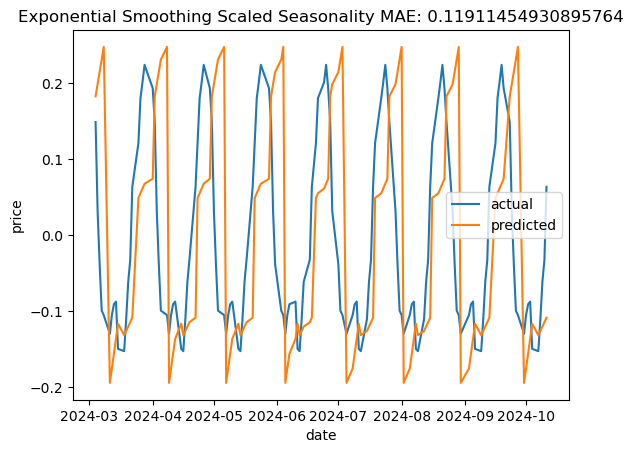

Exponential Smoothing Scaled Seasonality MAE: 0.11911454930895764


<Figure size 640x480 with 0 Axes>

In [6]:
viz.compareSimplePickleModel(data,'Exponential Smoothing','exponentialSmoothing_params')

## Prophet

23:57:41 - cmdstanpy - INFO - Chain [1] start processing
23:57:41 - cmdstanpy - INFO - Chain [1] done processing
23:57:41 - cmdstanpy - INFO - Chain [1] start processing
23:57:41 - cmdstanpy - INFO - Chain [1] done processing
23:57:41 - cmdstanpy - INFO - Chain [1] start processing
23:57:41 - cmdstanpy - INFO - Chain [1] done processing
23:57:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:57:41 - cmdstanpy - INFO - Chain [1] start processing
23:57:42 - cmdstanpy - INFO - Chain [1] done processing
23:57:42 - cmdstanpy - INFO - Chain [1] start processing
23:57:42 - cmdstanpy - INFO - Chain [1] done processing
23:57:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:57:42 - cmdstanpy - INFO - Chain [1] start processing
23:57:42 - cmdstanpy - INFO - Chain [1] done processing
23:57:43 -

(396.2604505460078, 470.1834515719101)

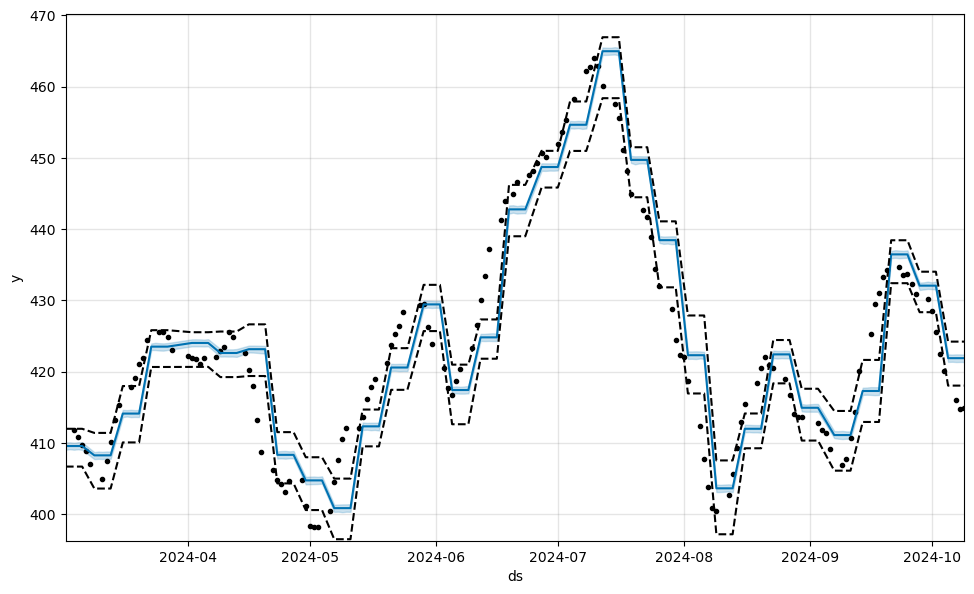

In [7]:
train,validation = loadData.splitData(data)
with open('../Models/prophet_params.json') as f:
    params = json.load(f)
fullPredict, forecast = tm.makeFullProphetPrediction(params,train,data,periods = 5)
model = Prophet(**params)
model.fit(data)

forecast = forecast.loc[:, ~forecast.columns.duplicated()]
forecast['ds'] = pd.to_datetime(forecast['ds'])
future_forecast = forecast[forecast['ds'] > train['ds'].max()]

fig = model.plot(forecast, xlabel = 'ds', ylabel = 'y')
ax = fig.gca()  # Get current axes
ax.set_xlim([future_forecast['ds'].min(), future_forecast['ds'].max()])
ax.set_ylim([0.99*future_forecast['yhat_lower'].min(), 1.01*future_forecast['yhat_upper'].max()])



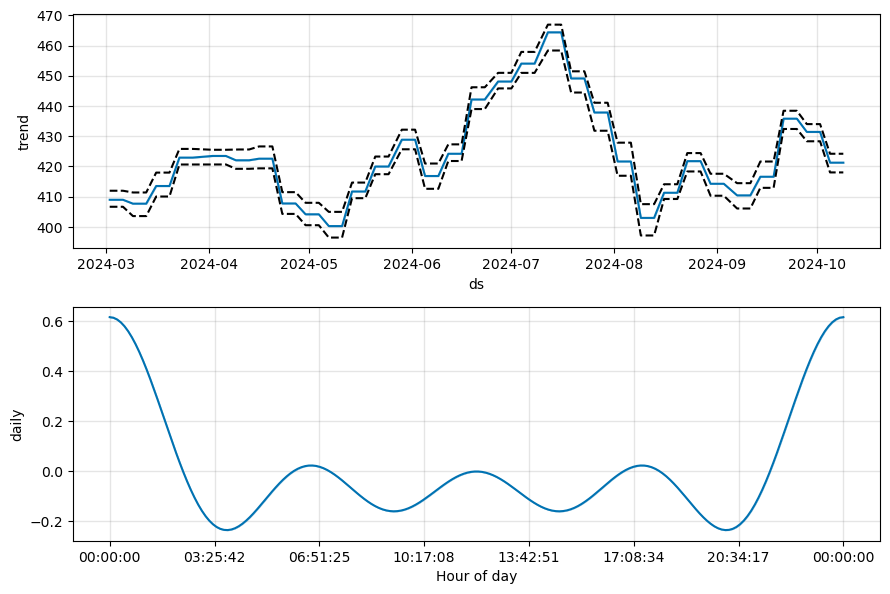

In [8]:
fig = model.plot_components(forecast)

0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


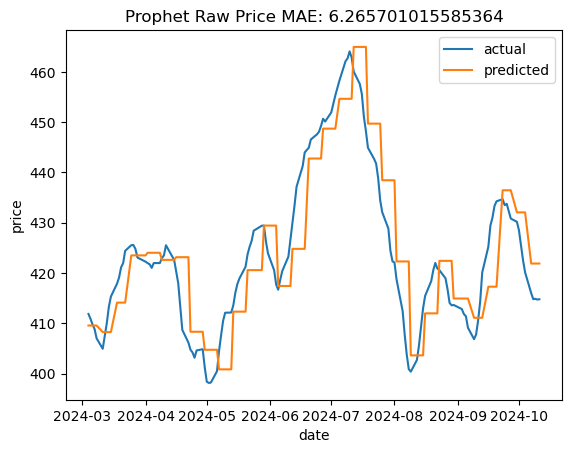

Prophet Raw Price MAE: 6.265701015585364


<Figure size 640x480 with 0 Axes>

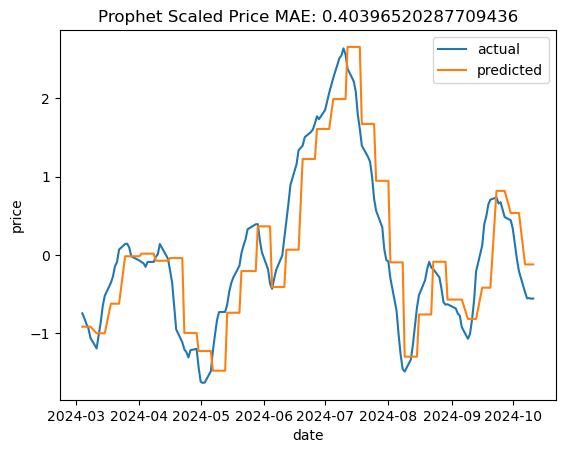

Prophet Scaled Price MAE: 0.40396520287709436


<Figure size 640x480 with 0 Axes>

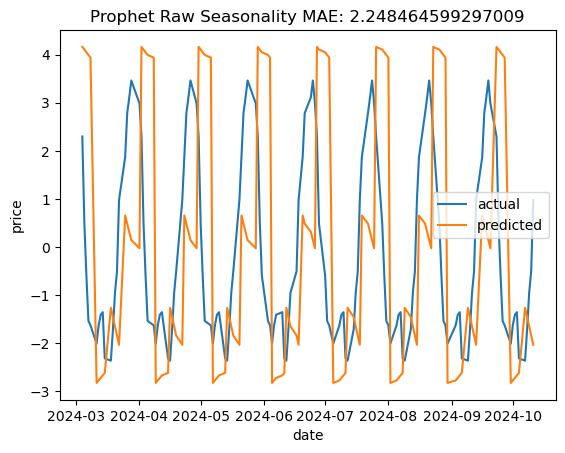

Prophet Raw Seasonality MAE: 2.248464599297009


<Figure size 640x480 with 0 Axes>

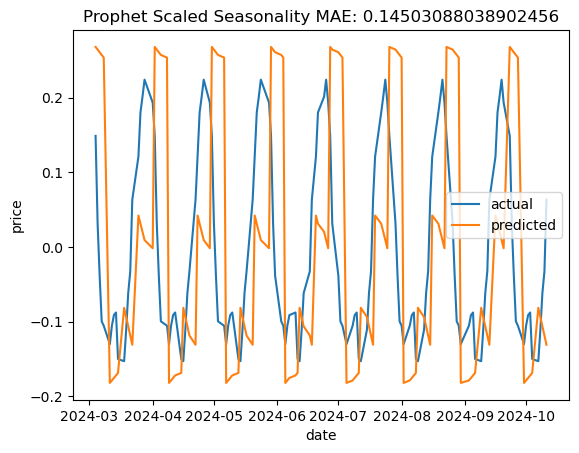

Prophet Scaled Seasonality MAE: 0.14503088038902456


<Figure size 640x480 with 0 Axes>

In [9]:
viz.compare(validation['ds'],validation['y'],fullPredict,'Prophet')

## LSTM

2025-01-12 23:57:57.605349: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-12 23:57:57.606073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-12 23:57:57.606499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5/5 [==============================] - 0s 4ms/step
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


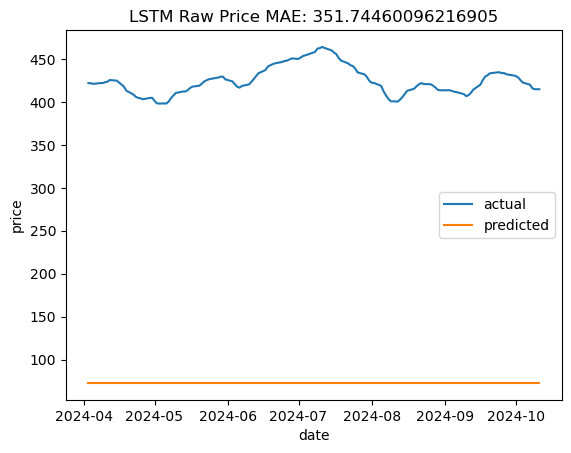

LSTM Raw Price MAE: 351.74460096216905


<Figure size 640x480 with 0 Axes>

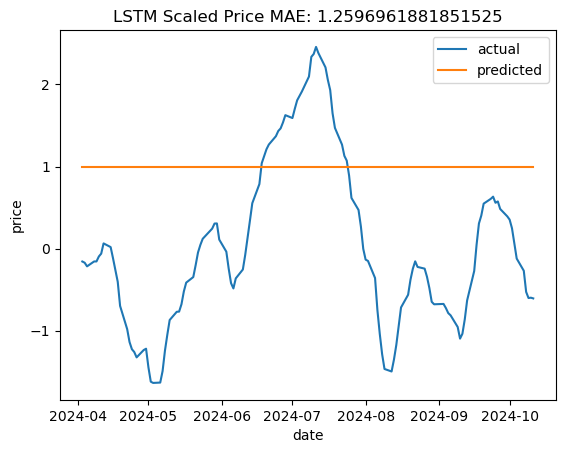

LSTM Scaled Price MAE: 1.2596961881851525


<Figure size 640x480 with 0 Axes>

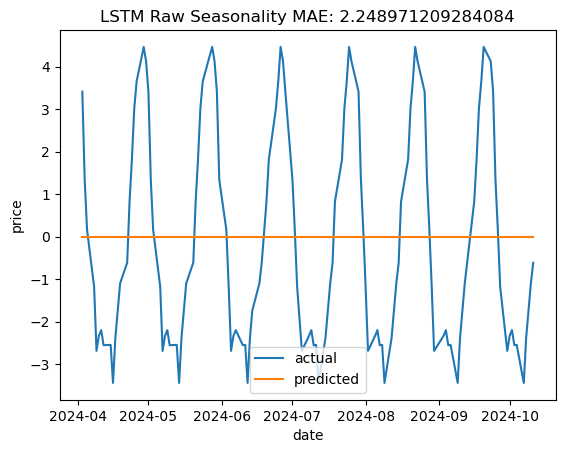

LSTM Raw Seasonality MAE: 2.248971209284084


<Figure size 640x480 with 0 Axes>

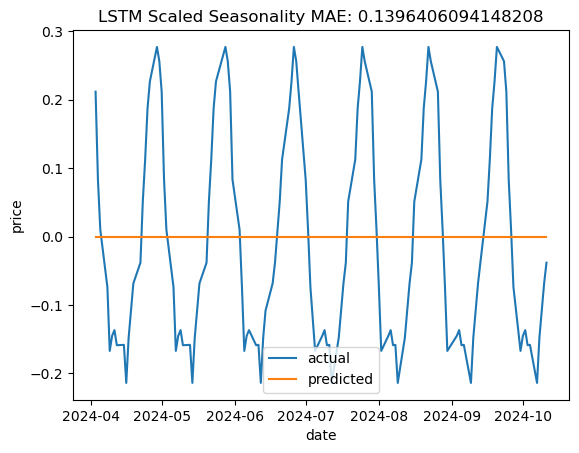

LSTM Scaled Seasonality MAE: 0.1396406094148208


<Figure size 640x480 with 0 Axes>

In [10]:
train,test = loadData.splitData(data)
model = keras.models.load_model('../Models/LSTM_.h5')
XTest, yTest = loadData.processDataForLSTM(test['y'])
yPredict = model.predict(XTest)
viz.compare(np.array(data['ds']).reshape(-1,)[-len(yTest):],yTest, yPredict ,'LSTM')